In [97]:
import numpy as np
import matplotlib.pyplot as plt
import random
from math import pi, sqrt


In [250]:

def cz_err_model(p_c,i_c):
    v_x = np.zeros(2,dtype=int)
    v_z = np.zeros(2,dtype=int)
    if i_c == 1:
        v_x[0] = 1
    elif i_c == 2:
        v_x[0] = 1
        v_z[0] = 1
    elif i_c == 3:
        v_z[0] = 1
    elif i_c == 4:
        v_z[1] = 1
    elif i_c == 5:
        v_x[0] = 1
        v_z[1] = 1
    elif i_c == 6:
        v_x[0] = 1
        v_z = np.ones(2,dtype=int)
    elif i_c == 7:
        v_z = np.ones(2,dtype=int)
    if i_c ==0:
        prob = 1-14*p_c/15
    # elif i_c <= 4:
    #     prob = 2*p_c/15
    else:
        prob = 2*p_c/15
    return v_x, v_z, prob


def cz_err_gen(err,i_c,i_t,v_x,v_z):
    if err == 1:
        v_x[i_c] += 1
    elif err == 2:
        v_x[i_c] += 1
        v_z[i_c] += 1
    elif err == 3:
        v_z[i_c] += 1
    elif err == 4:
        v_z[i_t] += 1
    elif err == 5:
        v_x[i_c] += 1
        v_z[i_t] += 1
    elif err == 6:
        v_x[i_c] += 1
        v_z[[i_c,i_t]] += 1
    elif err == 7:
        v_z[[i_c,i_t]] += 1
    return 0



## hadamard

In [251]:

pc_list = np.linspace(0,0.5,50)

p_flip = 2*pc_list/3
P_m = np.zeros((4,len(p_flip)))  # I, X, Z, Y
P_m[0,:] = (1-p_flip)**4 + 2*p_flip**3 * (1-p_flip) + p_flip**2 * (1-p_flip)**2 
P_m[1,:] = 2*p_flip * (1-p_flip)**3 + p_flip**2 * (1-p_flip)**2 + p_flip**4  
P_m[2,:] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
P_m[3,:] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)

P_tot = np.zeros((4,len(pc_list))) # I, X, Z, Y
for i_p, p_c in enumerate(pc_list):
    for i_1 in range(8):
        vec_x = np.zeros(5,dtype=int)
        vec_z = np.zeros(5,dtype=int)
        vx, vz, p1 = cz_err_model(p_c,i_1)
        vec_x[0:2] += vx
        vec_z[0:2] += vz
        for i_2 in range(8):
            vx, vz, p2 = cz_err_model(p_c,i_2)
            vec_x[1:3] += vx
            vec_z[1:3] += vz
            for i_3 in range(8):
                vx, vz, p3 = cz_err_model(p_c,i_3)
                vec_x[2:4] += vx
                vec_z[2:4] += vz
                for i_4 in range(8):
                    vx, vz, p4 = cz_err_model(p_c,i_4)
                    vec_x[3:5] += vx
                    vec_z[3:5] += vz

                    for i_0 in range(4):                        
                        xcomp = (np.sum(vec_z[[0,2,3]])+ np.sum(vec_x[[2,3,4]])+ (i_0%2) )%2
                        zcomp = ( np.sum(vec_z[[1,2,4]])+np.sum(vec_x[[1,2]])+ int(i_0/2) )%2

                        P_tot[2*zcomp+xcomp,i_p] += P_m[i_0,i_p]*p1*p2*p3*p4


In [248]:
## Monte-Carlo version
"""
0----1----2----3----4
"""

pc_list = np.linspace(0,0.5,50)

p_flip = 2*pc_list/3
P_m = np.zeros((4,len(p_flip)))  # I, X, Z, Y
P_m[0,:] = (1-p_flip)**4 + 2*p_flip**3 * (1-p_flip) + p_flip**2 * (1-p_flip)**2 
P_m[1,:] = 2*p_flip * (1-p_flip)**3 + p_flip**2 * (1-p_flip)**2 + p_flip**4  
P_m[2,:] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
P_m[3,:] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)

Niter= 1000
P_tot_mc = np.zeros((4,len(pc_list))) # I, X, Z, Y
for i_p, p_c in enumerate(pc_list):
    weights = np.concatenate(([1-14/15*p_c],np.ones(7)*2/15*p_c))
    for i_iter in range(Niter):
        vec_x = np.zeros(5,dtype=int)
        vec_z = np.zeros(5,dtype=int)

        for i_l in range(4):
            i_1 = np.random.choice(8, 1, p=weights)
            # vx, vz = cz_err_gen(p_c,i_1)
            # vec_x[i_l:i_l+2] += vx
            # vec_z[i_l:i_l+2] += vz
            cz_err_gen(i_1,i_l,i_l+1,vec_x,vec_z)
            
        for i_0 in range(4):                        
            xcomp = (vec_z[0]+ vec_x[2] + vec_z[2] + vec_x[3] + vec_z[3] + vec_x[4]+ (i_0%2) )%2
            zcomp = (vec_x[1] + vec_z[1] + vec_x[2] + vec_z[2] + vec_z[4]+ int(i_0/2) )%2

            P_tot_mc[2*zcomp+xcomp,i_p] += P_m[i_0,i_p]
            
P_tot_mc /= Niter

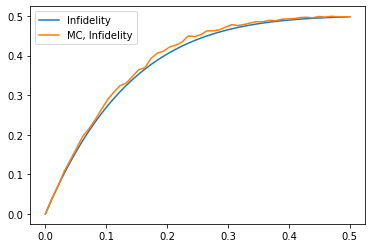

In [252]:
# for i_l in range(1,4):
# #     plt.plot(pc_list,P_tot[i_l,:])
# plt.plot(pc_list,P_tot[1,:],"-",label="X err")
# plt.plot(pc_list,P_tot[2,:],"-",label="Z err")
# plt.plot(pc_list,P_tot[3,:],"-",label="Y err")

# plt.plot(pc_list,P_tot_mc[1,:],".",label="MC, X err")
# plt.plot(pc_list,P_tot_mc[2,:],"x",label="MC, Z err")
# plt.plot(pc_list,P_tot_mc[3,:],".",label="MC,Y err")



# # # plt.plot(pc_list,np.sum(p_tot[0:,:],axis=0))
inFid = 2/3*np.sum(P_tot[1:,:],axis=0)
plt.plot(pc_list,inFid,"-", label="Infidelity")

inFid_mc = 2/3*np.sum(P_tot_mc[1:,:],axis=0)
plt.plot(pc_list,inFid_mc,"-", label="MC, Infidelity")

# plt.plot(pc_list,(28/15+4*(2/3)**2)*pc_list,"k--",label="linear fit")
# plt.ylim(0,0.52)
# # # plt.xlim(0,0.001)
# # plt.xlabel(r"$p_{cz}=p_m$")
# # # plt.ylabel("1-Fidelity")
# plt.yscale("log")
plt.legend()
plt.show()


## CNOT

In [ ]:

def cz37_err_gen(err,v_x,v_z):
    if err == 1:
        v_z[[2,7]] += 1
    elif err == 2:
        v_z[[2,3,7]] += 1
    elif err == 3:
        v_z[3] += 1
    elif err == 4:
        v_z[7] += 1
    elif err == 5:
        v_z[2] += 1
    elif err == 6:
        v_z[[2,3]] += 1
    elif err == 7:
        v_z[[3,7]] += 1
    return 0

"""
X0----Y1----Y2----Y3----Y4-----Y5-----6
                  |
                  Y7
                  |
X8----X9---X10---Y11----X12----X13-----14
"""

Xinds_z_c = [2,3,4,7]
Zinds_z_c = [0,2,3,4,7,8,10]
inds_x_c = [1,2,4,5]
inds_z_t = [8,10,12]
Xinds_x_t = [1,2,7,11]
Zinds_x_t = [1,2,7,9,11,13]

## Monte-Carlo version
pc_list = np.linspace(0,0.5,50)

p_flip = 2*pc_list/3
P_m = np.zeros((4,len(p_flip)))  # I, X, Z, Y
P_m[0,:] = (1-p_flip)**4 + 2*p_flip**3 * (1-p_flip) + p_flip**2 * (1-p_flip)**2 
P_m[1,:] = 2*p_flip * (1-p_flip)**3 + p_flip**2 * (1-p_flip)**2 + p_flip**4  
P_m[2,:] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)
P_m[3,:] = p_flip * (1-p_flip)**3 + 2* p_flip**2 * (1-p_flip)**2 + p_flip**3 * (1-p_flip)

Niter= 1000
P_tot_mc = np.zeros((16,len(pc_list))) # I, X, Z, Y
for i_p, p_c in enumerate(pc_list):
    weights = np.concatenate(([1-14/15*p_c],np.ones(7)*2/15*p_c))
    for i_iter in range(Niter):
        vec_x = np.zeros(15,dtype=int)
        vec_z = np.zeros(15,dtype=int)

        for i_l in range(14):
            i_1 = np.random.choice(8, 1, p=weights)
            if i_l <= 5 or i_l >= 8: # lower/upper rung
                cz_err_gen(i_1,i_l,i_l+1,vec_x,vec_z)
            elif i_l == 6: # 3-7
                cz37_err_gen(i_1,vec_x,vec_z)
            elif i_l == 7: # 7-11
                cz_err_gen(i_1,7,11,vec_x,vec_z)

        sz_c = np.sum(vec_x[Xinds_z_c]) + np.sum(vec_z[Zinds_z_c])
        sx_c = np.sum(vec_x[inds_x_c]) + np.sum(vec_z[inds_x_c])
        sz_t = np.sum(vec_z[inds_z_t])
        sx_t = np.sum(vec_x[Xinds_x_t]) + np.sum(vec_z[Zinds_x_t])
        i_e = np.array([sz_c%2,sx_c%2,sz_t%2,sx_t%2])@ (2**np.arange(4))

        P_tot_mc[i_e,i_p] += 1
            
P_tot_mc /= Niter

In [ ]:
err_list={0: 'II', 1: 'ZI', 2: 'XI', 3: 'YI', 4: 'IZ', 5: 'ZZ', 6: 'XZ',\
          7: 'YZ', 8: 'IX', 9: 'ZX', 10: 'XX', 11: 'YX', 12: 'IY',\
          13: 'ZY', 14: 'XY', 15: 'YY'}

# plt.figure(1,figsize=(5,3))
# [Z_c,X_c,Z_t,X_t] # numbering scheme    
for i_xx in np.arange(1,16):
# for i_xx in [8,6]:
    plt.figure(i_xx,figsize=(5,3))
    plt.plot(pc_list,P_tot_mc[i_xx,:],"-", label=err_list[i_xx])#, color="C%d" % (i_xx)

    # plt.xlim(4,31)
    plt.xlabel(r"$p_{cz}$")
    plt.ylabel("Error prob.")
    # plt.grid()
    plt.legend(frameon=False,markerscale=2)
    plt.tight_layout()
    # plt.grid()
    # plt.savefig("figs/cnot_err_%s.pdf" % err_list[i_xx])
    plt.show()